In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Экзамен. Экзаменационный билет №17
## Студент: Кусербаев Карим Ильгамович, ПИ21-4
### Датасет: Glass Classification
### Вариант 1. Очистка данных и обучение моделей

Необходимо подготовить данные и обучить несколько моделей, сравнить их эффективность.

Загрузим датасет в Jupyter Notebook

In [131]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Данные состоят из 9 числовых признаков и класса объекта, который будет необходимо предсказать.

Решаемая задача: задача классификации

In [132]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Всего классов - 6. При небинарной классификации и малом разрыве количества объектов разных классов считаю, что бороться с дисбалансом классов нецелесообразно.

In [133]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [135]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Входные данные не содержат пропусков признаков у объектов, также они все являются числовыми данными

Опишем признаки: по названиям столбцов смею предположить, что признаки каждого объекта - это содержание того или иного химического элемента в составе, по которым можно по-разному классифицировать каждцый объект (стекло)

Попробуем узнать количество значений каждого признака, чтобы убедиться, что они количественные

In [136]:
data.RI.value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64

In [137]:
data.Na.value_counts()

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64

In [138]:
data.Mg.value_counts()

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64

In [139]:
data.Al.value_counts()

1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64

In [140]:
data.Si.value_counts()

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64

In [141]:
data.K.value_counts()

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64

In [142]:
data.Ca.value_counts()

8.03    5
8.43    5
9.57    4
8.79    4
8.44    4
       ..
9.23    1
8.90    1
9.13    1
8.09    1
8.62    1
Name: Ca, Length: 143, dtype: int64

In [143]:
data.Ba.value_counts()

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64

In [144]:
data.Fe.value_counts()

0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

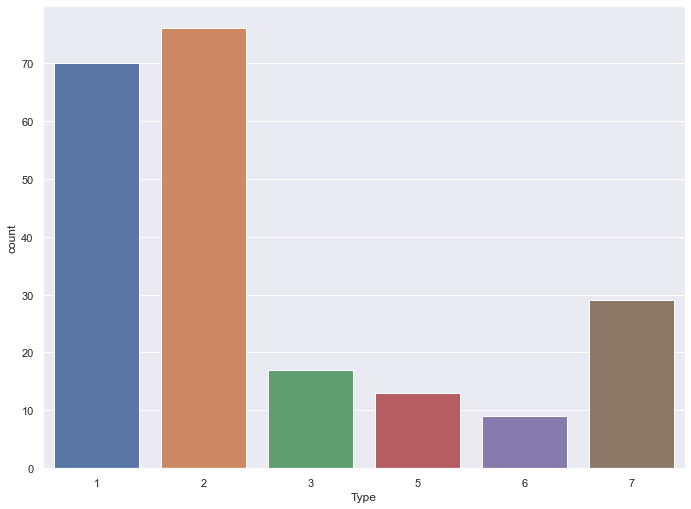

In [145]:
sns.countplot(x = data.Type)

Проверим данные на дупликаты. 

In [146]:
data.duplicated().sum()

1

In [147]:
data.duplicated().head(50)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39     True
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [148]:
data.drop(index = 39, axis = 0, inplace = True)

In [149]:
data.duplicated().sum()

0

Построим матрицу корреляции данных

In [150]:
sns.set(rc={'figure.figsize':(11.5,8.5)}) #увеличение размера графика

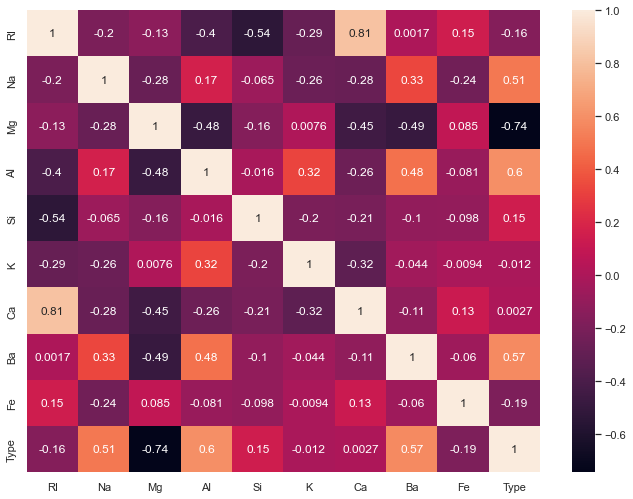

In [151]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Можно заметить ярко выраженную корреляцию некоторых признаков, например Ca-RI, Mg-Type (отрицательное значение, значит Type сильно меняет тип из-за Mg), Al-Type, Ba-Type.

<AxesSubplot:xlabel='Na', ylabel='Al'>

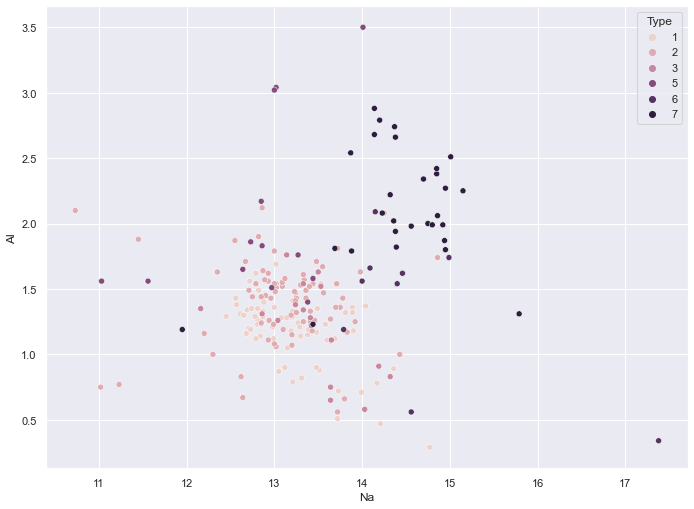

In [152]:
sns.scatterplot(data=data, x='Na', y='Al', hue='Type')

Вот так выглядит карта классов по параметрам Na, Al, выбрал их за оси из-за сильного влияния на Type. Так как признаков несколько, можно видеть некоторые выбросы, происходящие из-за влияния остальных признаков, которые я не учитывал при построении.

Разделим данные на признаки и целевую переменную.

In [153]:
X = data.drop('Type', axis=1)
y = data.Type
X.shape, y.shape

((213, 9), (213,))

Данные не имеют признаков-объектов и категориальных данных, поэтому использование LabelEncoder и OneHotDummies не нужно. Также признаков достаточное количество, не вижу мысла добавлять новые. Также не вижу смысла использовать метод главных компонент, так как признаков всего 9, это не очень большое количество.

### Данные не имеют пропусков, но имеют разные диапазоны данных. Нормализуем данные с помощью StandardScaler, почему именно им:

- Каждый признак находится в своем определенном диапазоне, но у некоторых данных содержатся нулевые значения - по сути отсутствие какого-либо элемента в составе. Нам важно сохранить не диапазон значений, а различие между 0 и реальным значением. Для этого лучше подойдет StandardScaler, нежели MinMaxScaler, потому что мы рискуем потерять значимость признаков.

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
ss = StandardScaler()

In [156]:
X_scaled = ss.fit_transform(X)
X_scaled.shape

(213, 9)

In [157]:
X_scaled

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

Данные нормализованы и готовы к разделению на обучающую и тестовую выборку

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

Попробуем обучить несколько моделей и сравнить их эффективность. Для более приближенного к реальному результату буду использовать кросс-валидацию. Постараюсь подобрать модели с разными алгоритмами работы. Для метрики будем использовать f1-score, который включает в себя precision и recall, accuracy. 

In [160]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [161]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
sv = SVC(kernel='rbf')
net = MLPClassifier()

In [162]:
%%time
cv_knn = cross_validate(knn, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy', 'f1_weighted'])
cv_knn['test_accuracy'].mean(), cv_knn['test_f1_weighted'].mean()

Wall time: 3.71 s


(0.6058823529411766, 0.5802568640036669)

In [179]:
%%time
cv_rf = cross_validate(rf, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy', 'f1_weighted'])
cv_rf['test_accuracy'].mean(), cv_rf['test_f1_weighted'].mean()

Wall time: 292 ms


(0.7647058823529411, 0.7525502928444106)

In [164]:
%%time
cv_sv = cross_validate(sv, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy', 'f1_weighted'])
cv_sv['test_accuracy'].mean(), cv_sv['test_f1_weighted'].mean()

Wall time: 25 ms


(0.6294117647058823, 0.5993896862291004)

In [165]:
%%time
cv_net = cross_validate(net, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy', 'f1_weighted'])
cv_net['test_accuracy'].mean(), cv_net['test_f1_weighted'].mean()

Wall time: 363 ms


(0.6588235294117647, 0.6391139318198142)

Вывод: лучше всех показала себя модель случайного леса, поэтому предлагаю использовать её далее.

Теперь необходимо подобрать гиперпараметры для RandomForest. Для начала попробуем найти параметры случайно, чтобы сократить поиск.

In [101]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=1)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

Попробуем использовать эти параметры на обучении

In [166]:
rf2 = RandomForestClassifier(n_estimators=700, min_samples_split=12, min_samples_leaf=3, max_features='sqrt', 
                            max_depth=15, bootstrap=False)
cv_rf2 = cross_validate(rf2, X_train, y_train, cv=5, n_jobs=-1, scoring=['accuracy', 'f1_weighted'])
cv_rf2['test_accuracy'].mean(), cv_rf2['test_f1_weighted'].mean()

(0.7529411764705882, 0.7389283759519323)

Сравнивая результаты двух моделей, можно заметить, что модель с базовыми настройками показала лучше результат. Это связано с тем, что случайный подбор параметров - это не тонкая настройкая параметров модели, и возможно, мы просто не смогли за столь короткий промежуток времени (1.5 часа идёт экзамен) подобрать лучшие параметры.

Учитывая это, продолжим использовать первую модель.

In [187]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [188]:
from sklearn.metrics import confusion_matrix, f1_score

In [189]:
f1_score(y_test, y_pred, average='weighted')

0.8348357524828113

In [190]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[15,  1,  2,  0,  0,  0],
       [ 0, 12,  0,  0,  1,  0],
       [ 1,  2,  3,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  3]], dtype=int64)

<AxesSubplot:>

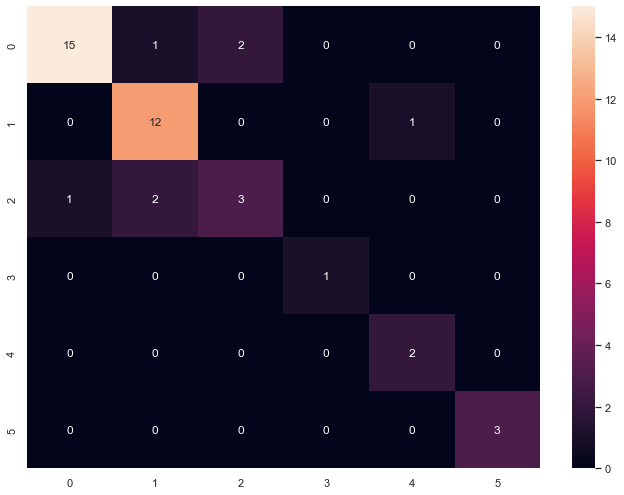

In [191]:
sns.heatmap(data=conf, annot=True)

Вывод: мы добились хорошего результата для случайного леса. Модель предсказывает довольно точно, учитывая количество классов.